# Week 1

## Overview
As explained in during the in-class lecture, each week of this class is an Jupyter notebook like this one. **_In order to successfully follow the class, you simply start reading from the top_**, following the instructions. As you read, you will encounter three things that should cause you to take a break from reading or sometimes leave the page for a little bit:

* Instructions to **check out a video lecture**.
* Instructions to **read something** (I don't use a single textbook, so will make sure to link to the relevant text).
* Instructions to **solve a few exercises**. Ideally you should solve the exercises on your own, but work on and discuss the problems as part of a 3 person group. Exercises should be carried out within a Jupyter notebook (explained below). The exercises are the most important part of the class. It is through the exercises that you will learn the course material, and because the exercises lay the foundations for the two mandatory course assignment (due after week 4 and week 8). 

**Hint**: And you can ask us for help at any point if you get stuck!

## AI and this class

This class is *AI first*. This means that you're allowed to use LLMs to help in answering the questions. 

In fact, you could use a good model to do most (if not all) of the work for you. As I will discuss in detail during the lecture **you shouldn't always do that**. Part of the point of being here is learning how to do certain things using your human brain. To make you better at thinking. If you use the AI for everything you will get worse at thinking. 

And don't forget that the whole point of going to University in the first place is to get better at thinking. So if you just use the AI you're defeating the purpose of spending time at DTU. You'll be wasting your life.

On the other hand, there are many things that it's not important to do on your own. And how the h#ll do you tell what's what? How do you know when to use LLMs and when not to?

<div class="alert alert-block alert-info">
To be of assistance, I've designed a system of blue boxes that I use to clarify this issue. I basically tell you when LLMs are OK and when they don't! Awesome, right?
</div>

## Today

This first lecture covers:

1. **A case study in algorithmic accountability**: We'll explore predictive policing—what it promised, what went wrong, and what we can learn from it.
2. **Hands-on data analysis**: We'll go and grab real San Francisco crime data and start exploring it.

If you want to prepare, you might enjoy watching *Minority Report* (2002)—it's a surprisingly relevant film for this class.

---

# Part 1: Predictive Policing—A Cautionary Tale

For years, "predictive policing" was pitched as the future of law enforcement. The idea was simple: use data and algorithms to predict where crimes would occur, then deploy police resources accordingly. It connected to popular culture through shows like [NUMB3RS](https://en.wikipedia.org/wiki/Numbers_(TV_series)) and films like [Minority Report](https://www.imdb.com/title/tt0181689/). Companies like PredPol and Palantir built businesses selling these tools to police departments.

But the story didn't end the way proponents hoped.

**By the early 2020s, many cities abandoned these systems:**
- The **LAPD dropped PredPol in 2020** after audits showed it failed to reduce crime and disproportionately targeted Black and Latino neighborhoods
- **Santa Cruz became the first U.S. city to ban predictive policing** entirely
- Academic research revealed that these systems often **amplified existing biases** rather than providing objective predictions

This makes predictive policing a perfect case study for our class. It shows how data analysis and visualization can be powerful—but also how they can go wrong when we don't think carefully about bias, feedback loops, and the human consequences of algorithmic decisions.

Here's a video introduction to the topic:

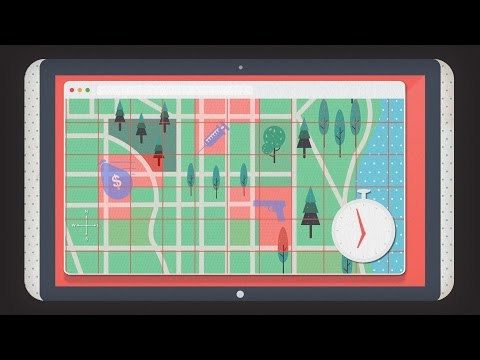

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('YxvyeaL7NEM', width=800, height=450)

([Direct YouTube link](https://www.youtube.com/watch?v=YxvyeaL7NEM) if the embed doesn't work)

### Readings

Please read the following two pieces:

1. **[Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)** (ProPublica, 2016) — A landmark investigation into algorithmic bias in criminal risk assessment. While focused on sentencing rather than patrol allocation, it illustrates the core problems with using historical crime data to make predictions.

2. **[Dirty Data, Bad Predictions: How Civil Rights Violations Impact Police Data](https://www.nyulawreview.org/issues/volume-94-number-1/dirty-data-bad-predictions-how-civil-rights-violations-impact-police-data-predictive-policing-systems-and-justice/)** (Richardson et al., 2019) — This paper argues that police data itself is corrupted by historical discrimination, making any predictions based on retrospective fundamentally flawed. You can skim the legal details but pay attention to the core argument (it's even OK to get an LLM to summarize the data-science relevant parts for you).

> **Exercise 1.1**: After taking a look at the papers, answer the following in your own words:
>
> * The ProPublica article examines COMPAS, a risk assessment algorithm. What did they find about its accuracy for Black defendants vs. white defendants?

The ProPublica investigation by ProPublica examined the COMPAS risk assessment algorithm and found that it was not equally accurate across racial groups, even though its overall accuracy appeared similar for Black and white defendants.

Specifically, the article showed that:

* Black defendants were much more likely to be false positives. That is, they were disproportionately labeled as “high risk” even though they did not go on to reoffend within the two-year follow-up period.

* White defendants were more likely to be false negatives, meaning they were labeled “low risk” but later did reoffend.

This matters because false positives in criminal justice are especially harmful: being incorrectly labeled high risk can lead to harsher sentences, denial of bail, or increased surveillance. While the company behind COMPAS defended the tool by arguing that it was calibrated (people with the same score reoffended at similar rates regardless of race), ProPublica showed that this calibration came at the cost of unequal error rates. In practice, the algorithm systematically imposed greater risk and punishment on Black defendants.

The key takeaway is that “equal accuracy” is not the same as “equal fairness.” An algorithm can appear statistically sound while still producing racially unequal harms.


> * Richardson et al. argue that the *data itself* is problematic. Explain the concept of "dirty data" in your own words. Why can't we just "fix the algorithm" if the training data is biased? Do you agree with this argument?

Richardson, Schultz, and Crawford introduce the concept of “dirty data” to argue that the problem with predictive policing systems starts before the algorithm is ever built.

In my own words, dirty data is data that is corrupted not just by random errors or missing values, but by biased, unlawful, or discriminatory practices that shaped how the data was created in the first place. In the policing context, this includes:

* Arrests driven by racial profiling or unconstitutional stops

* Manipulated or downgraded crime reports (“juked stats”)

* Selective enforcement of minor offenses in certain neighborhoods

* Underreporting of crime in communities that distrust police

* Records created during periods of documented police misconduct

Because police data reflects policing behavior rather than objective crime levels, it encodes historical and structural bias. When an algorithm is trained on this data, it learns those distortions as if they were facts about crime.

This is why the authors argue that we cannot simply “fix the algorithm.” Technical adjustments -such as removing certain variables, reweighting features, or applying fairness constraints- assume that there is a reliable, unbiased signal hidden inside the data. But if the entire dataset is shaped by discriminatory practices, there is no clean ground truth to recover. In that situation, the algorithm is not misbehaving; it is faithfully reproducing a biased system.

I find this argument persuasive. It challenges a common data-science instinct to treat bias as a technical glitch rather than a social and institutional problem. If the data-generation process itself is unjust, then improving the model does not address the underlying harm -it may even legitimize it by giving biased outcomes a veneer of objectivity.

> * Given what you've read, why do you think cities like Los Angeles and Santa Cruz decided to abandon predictive policing?

Given what these readings show, it makes sense that cities like Los Angeles and Santa Cruz decided to abandon predictive policing programs.

First, predictive policing systems tend to create feedback loops. Historical police data -already shaped by over-policing of certain communities -leads algorithms to recommend more policing in those same areas. Increased police presence then generates more arrests and reports, reinforcing the original pattern. Over time, this can intensify racial and geographic disparities rather than reduce crime.

Second, these cities faced growing evidence that predictive policing did not deliver clear public-safety benefits, while posing serious civil rights risks. When systems increase police contact without demonstrably reducing violence, the trade-off becomes difficult to justify.

Finally, there was rising public concern about transparency, accountability, and trust. Predictive policing tools are often proprietary and opaque, making it hard for communities to understand or challenge how decisions are being made. In cities with histories of discriminatory policing, continuing to rely on such systems risked further eroding public trust.

Taken together, abandoning predictive policing can be seen not as a rejection of data or technology in general, but as a recognition that some problems are political and structural, not computational. In those contexts, the most responsible choice may be to stop using the tool altogether rather than trying to tweak it.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> You can use an LLM to answer these questions. But don't do it!!! The goal is to engage with the readings and form your own understanding. You can use an LLM afterward to refine your writing, but the thinking should be yours.
</div>

---

# Part 2: Getting the Data

Now let's get our hands on some real crime data. We'll be working with San Francisco Police Department incident data, which is publicly available through [SF OpenData](https://data.sfgov.org).

We'll use data from **2018 to the present**. This dataset is cleaner and more consistently formatted than older data, and it covers an interesting period that includes the COVID-19 pandemic.

### Before You Code: Explore the Data

Before writing any code, spend a few minutes looking at the raw data:

> **Exercise 2.1**: Data exploration (no coding yet)
>
> * Go to https://data.sfgov.org and click on "Public Safety"
> * Find the dataset "Police Department Incident Reports: 2018 to Present"
> * Still on the website, scroll down the page and answer:
>   - What columns are available?

The dataset contains **29 columns**. Each column captures a specific aspect of a police incident, including timing, classification, location, and administrative details.

#### Identifiers and Report Metadata
- **Row ID**: Unique identifier for each row in the dataset  
- **Incident ID**: System-generated identifier for an incident report  
- **Incident Number**: Case number used to reference reports and documents  
- **CAD Number**: Computer Aided Dispatch identifier (not present for all incidents)  
- **Report Type Code**: System code indicating report type  
- **Report Type Description**: Human-readable description of report type  
- **Filed Online**: Indicates whether the report was filed via Coplogic (online self-reporting system)  

#### Time and Date Information
- **Incident Datetime**: Date and time when the incident occurred  
- **Incident Date**: Date the incident occurred  
- **Incident Time**: Time of day the incident occurred  
- **Incident Year**: Year of the incident (for convenience)  
- **Incident Day of Week**: Day of the week of the incident  
- **Report Datetime**: Date and time when the report was filed  

#### Crime Classification
- **Incident Code**: System code describing the type of incident  
- **Incident Category**: High-level category mapped from the incident code  
- **Incident Subcategory**: More detailed category mapped from the incident code  
- **Incident Description**: Textual description of the incident  
- **Resolution**: Status of the incident at the time of reporting (e.g., Open, Arrest, Unfounded)  

#### Location and Geography
- **Intersection**: Closest intersecting streets to the incident  
- **CNN**: Centerline Node Network identifier for the intersection  
- **Police District**: SFPD district where the incident occurred  
- **Analysis Neighborhood**: Neighborhood defined by city planning and public health agencies  
- **Supervisor District**: Current Board of Supervisors district  
- **Supervisor District 2012**: Supervisor district boundaries used from 2012–2022  
- **Latitude**: Latitude coordinate (WGS84)  
- **Longitude**: Longitude coordinate (WGS84)  
- **Point**: Geographic point representation (WKT format)  

#### Data Management Fields
- **data_as_of**: Timestamp indicating data freshness  
- **data_loaded_at**: Timestamp when the data was uploaded to the portal 

>   - What does each row represent?

Each row represents **a single police incident report**.  
An incident may include one or more offense types, which is why a single Incident ID can appear multiple times with different Incident Codes.

Importantly, this dataset reflects **reported and recorded incidents**, not all crimes that actually occurred.

>   - What time range does the data cover?

- The dataset begins in **January 2018**
- It extends **to the present**, with frequent updates
- This period includes:
  - Pre-COVID years
  - The COVID-19 pandemic
  - Post-pandemic shifts in crime and reporting behavior

>   - What questions come to mind that this data might help answer?

Some questions this data could help explore include:

- How did reported crime change during COVID lockdowns?
- Are certain incident categories more common at specific times of day or days of the week?
- How do crime patterns vary across police districts or neighborhoods?
- Did some categories of crime increase while others decreased after 2020?
- How does reporting behavior differ between online-filed incidents and officer-filed incidents?

At the same time, the data raises important critical questions about **underreporting, policing practices, and structural bias** that should be kept in mind during analysis.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Do this exploration yourself. Getting familiar with raw data before coding is crucial. It's one of the most important parts of data science!
</div>

### Loading the Data

Now let's work with the data in Python. Load it into a Jupyter Notebook. Remember to use `pandas`, it is the standard tool for tabular data in Python. If you need a refresher, see the PythonBootcamp notebook

> **Exercise 2.2**: Load and clean the data
>
> * Download the "Police Department Incident Reports: 2018 to Present" dataset as a CSV
> * Load it into a pandas DataFrame
> * Keep only complete years (i.e., drop partial years at the start/end if the data doesn't begin on Jan 1 or end on Dec 31 of last year). (This is the first part that isn't super easy, so be patient). 
> * You'll want to keep at least: incident category, date/time, and location (both coordinates and police district)
> * Report:
>   - The total number of incidents in your cleaned dataset
>   - The date range covered
>   - The number of incident categories

If any of the above seems difficult, go back to the PythonBootcamp file and make sure your coding skillz are up to par.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> You're welcome to use an LLM for help with pandas syntax, data cleaning, and debugging. This is exactly the kind of task where LLMs excel.
</div>

In [2]:
import pandas as pd
from pathlib import Path

# -----------------------------
# 1) Load CSV
# -----------------------------
# File is in the same folder as this notebook/script
csv_path = Path("Police_Department_Incident_Reports__2018_to_Present_20260204.csv")
df = pd.read_csv(csv_path, low_memory=False)

# -----------------------------
# 2) Basic cleaning + parsing
# -----------------------------
# Make column names easier to work with (optional but helpful)
df.columns = [c.strip().lower() for c in df.columns]

# -----------------------------
# Parse date/time using the format shown in your screenshot
# -----------------------------
df["incident datetime"] = pd.to_datetime(
    df["incident datetime"],
    format="%Y/%m/%d %I:%M:%S %p",
    errors="coerce"
)

df["incident date"] = pd.to_datetime(
    df["incident date"],
    format="%Y/%m/%d",
    errors="coerce"
)

df["incident year"] = pd.to_numeric(df["incident year"], errors="coerce")

# -----------------------------
# Keep only the minimum required columns
# (use the EXACT column names with spaces)
# -----------------------------
df = df[
    [
        "incident id",
        "incident category",
        "incident subcategory",
        "incident description",
        "incident datetime",
        "incident date",
        "incident year",
        "latitude",
        "longitude",
        "police district",
    ]
].copy()


# -----------------------------
# Drop rows missing essential information
# Note: This may drop a small number of rows with missing coordinates.
# -----------------------------
df = df.dropna(
    subset=[
        "incident category",
        "incident datetime",
        "incident date",
        "incident year",
        "latitude",
        "longitude",
        "police district",
    ]
)

# -----------------------------
# COMPLETE YEARS (strict strategy):
# A year is complete if:
#   min(incident_date) is Jan 1 AND max(incident_date) is Dec 31
# -----------------------------
year_bounds = (
    df.groupby("incident year")["incident date"]
    .agg(year_min="min", year_max="max")
    .reset_index()
)

complete_years = year_bounds[
    (year_bounds["year_min"].dt.month == 1)
    & (year_bounds["year_min"].dt.day == 1)
    & (year_bounds["year_max"].dt.month == 12)
    & (year_bounds["year_max"].dt.day == 31)
]["incident year"].tolist()

# -----------------------------
# Filter to only complete years
# -----------------------------
df_clean = df[df["incident year"].isin(complete_years)].copy()

# -----------------------------
# Required report
# -----------------------------
total_incidents = len(df_clean)

if total_incidents > 0:
    date_start = df_clean["incident datetime"].min().date()
    date_end = df_clean["incident datetime"].max().date()
    num_categories = df_clean["incident category"].nunique()
else:
    date_start, date_end, num_categories = None, None, 0

print("=== Cleaned dataset summary ===")
print(f"Complete years included: {sorted(complete_years)}")
print(f"Total number of incidents: {total_incidents:,}")
print(f"Date range covered: {date_start} to {date_end}")
print(f"Number of incident categories: {num_categories}")

df_clean.head()


=== Cleaned dataset summary ===
Complete years included: [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]
Total number of incidents: 940,785
Date range covered: 2018-01-01 to 2025-12-31
Number of incident categories: 49


,incident id,incident category,incident subcategory,incident description,incident datetime,incident date,incident year,latitude,longitude,police district
0,1522782,Drug Offense,Drug Violation,"Narcotics Paraphernalia, Possession of",2025-10-31 17:55:00,2025-10-31,2025,"37,75226974487","-122,41787719727",Mission
1,1489982,Assault,Simple Assault,Battery,2025-06-13 12:41:00,2025-06-13,2025,"37,71812820435","-122,41417694092",Ingleside
4,1523269,Larceny Theft,Larceny Theft - From Building,"Theft, From Building, >$950",2025-10-23 00:00:00,2025-10-23,2025,"37,77379989624","-122,49825286865",Richmond
6,1489832,Burglary,Burglary - Residential,"Burglary, Residence, Unlawful Entry",2025-06-11 08:00:00,2025-06-11,2025,"37,77315139771","-122,42222595215",Northern
7,1489695,Robbery,Robbery - Street,"Robbery, Street or Public Place, W/ Force",2025-06-12 00:09:00,2025-06-12,2025,"37,76183700562","-122,4193572998",Mission


---

# Part 3: Exploring Crime Categories

With the data loaded, let's start exploring. A natural first question: **what kinds of crimes occur in San Francisco?**

> **Exercise 3.1**: Crime categories
>
> * List all unique incident categories in the dataset
> * Count the number of incidents in each category
> * What is the most common category? The least common?

In [3]:
# -----------------------------
# List all unique incident categories
# -----------------------------
unique_categories = sorted(df_clean["incident category"].unique())

print("Unique incident categories:")
for cat in unique_categories:
    print(cat)

print("\nNumber of unique categories:", len(unique_categories))


# -----------------------------
# Count number of incidents per category
# -----------------------------
category_counts = (
    df_clean["incident category"]
    .value_counts()
    .sort_values(ascending=False)
)

print("\nIncident counts by category:")
print(category_counts)


# -----------------------------
# Most and least common categories
# -----------------------------
most_common_category = category_counts.idxmax()
least_common_category = category_counts.idxmin()

print("\nMost common category:")
print(f"{most_common_category} ({category_counts.max():,} incidents)")

print("\nLeast common category:")
print(f"{least_common_category} ({category_counts.min():,} incidents)")


Unique incident categories:
Arson
Assault
Burglary
Case Closure
Civil Sidewalks
Courtesy Report
Disorderly Conduct
Drug Offense
Drug Violation
Embezzlement
Fire Report
Forgery And Counterfeiting
Fraud
Gambling
Homicide
Human Trafficking (A), Commercial Sex Acts
Human Trafficking (B), Involuntary Servitude
Human Trafficking, Commercial Sex Acts
Larceny Theft
Liquor Laws
Lost Property
Malicious Mischief
Miscellaneous Investigation
Missing Person
Motor Vehicle Theft
Motor Vehicle Theft?
Non-Criminal
Offences Against The Family And Children
Other
Other Miscellaneous
Other Offenses
Prostitution
Rape
Recovered Vehicle
Robbery
Sex Offense
Stolen Property
Suicide
Suspicious
Suspicious Occ
Traffic Collision
Traffic Violation Arrest
Vandalism
Vehicle Impounded
Vehicle Misplaced
Warrant
Weapons Carrying Etc
Weapons Offence
Weapons Offense

Number of unique categories: 49

Incident counts by category:
incident category
Larceny Theft                                   266196
Other Miscellaneous     


> **Exercise 3.2**: Visualize crime categories
>
> Create a bar chart showing the number of incidents by category.
>
> **Visualization tips:**
> * With many categories, a **horizontal bar chart** is often easier to read (category names fit better)
> * Sort bars by frequency (most common at top or bottom)
> * **Always label your axes** — a plot without labels is just a pretty shape (and makes me insane)
> * Consider whether you need to show *all* categories or just the top N (it's OK to make a choice here). You could also show categories with more than 1000 examples, etc.
> * What would happen if you used log-counts/or logarithmic axes?
> * Consider removing the uninformative categories, such as `Other Miscellaneous`, `Other Offenses`, etc.
> * Add a title that tells the reader what they're looking at

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Feel free to use an LLM for creating the visualization. But make sure you understand the code—you'll be making many more plots in this course.
</div>

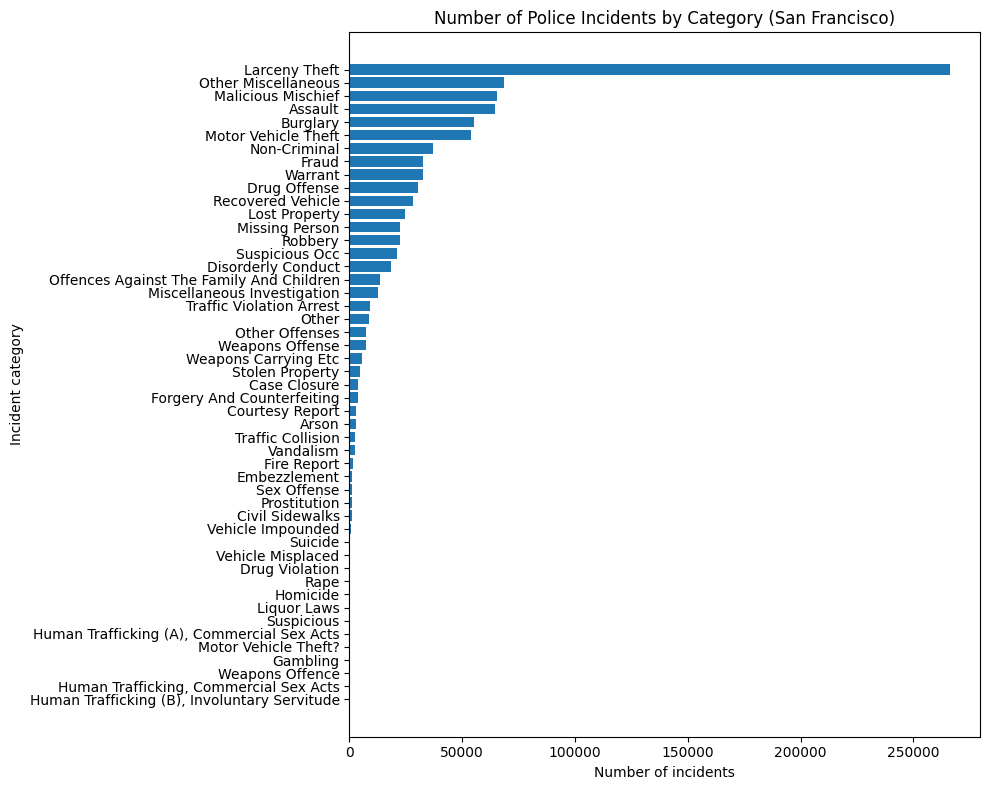

In [4]:
import matplotlib.pyplot as plt

# Count incidents per category
category_counts = (
    df_clean["incident category"]
    .value_counts()
    .sort_values(ascending=True)  # ascending for horizontal bars
)

plt.figure(figsize=(10, 8))
plt.barh(category_counts.index, category_counts.values)
plt.xlabel("Number of incidents")
plt.ylabel("Incident category")
plt.title("Number of Police Incidents by Category (San Francisco)")

plt.tight_layout()
plt.show()


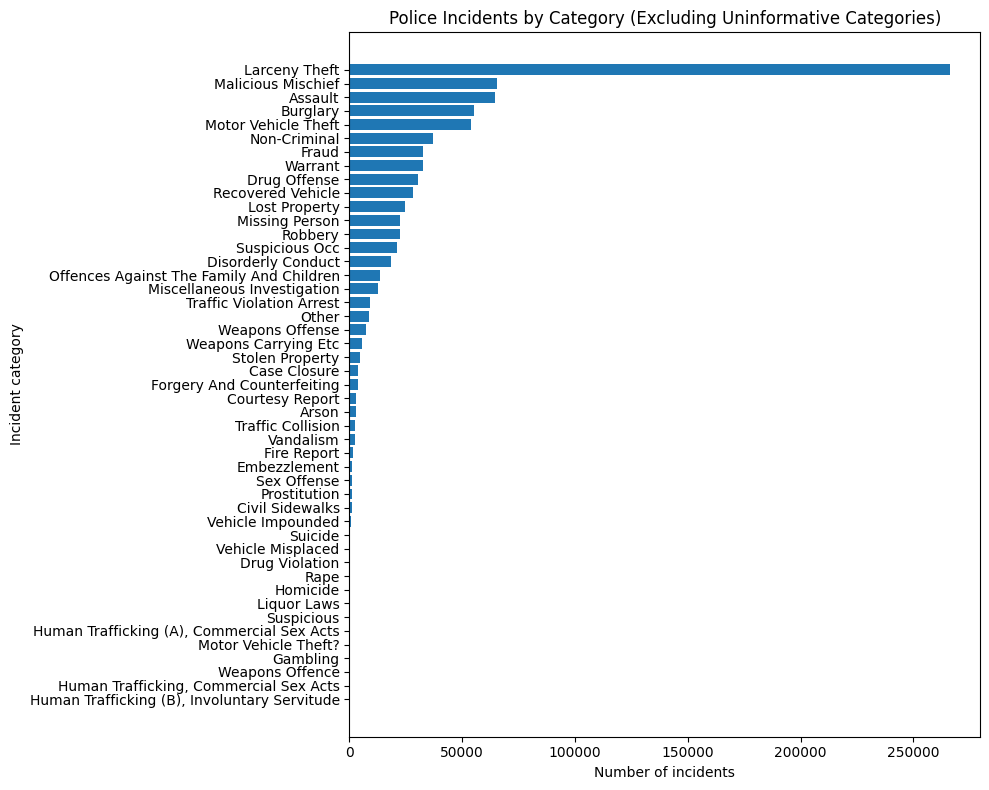

In [5]:
uninformative = [
    "Other Offenses",
    "Other Miscellaneous",
]

filtered_counts = category_counts.drop(
    labels=[c for c in uninformative if c in category_counts.index]
)

plt.figure(figsize=(10, 8))
plt.barh(filtered_counts.index, filtered_counts.values)
plt.xlabel("Number of incidents")
plt.ylabel("Incident category")
plt.title("Police Incidents by Category (Excluding Uninformative Categories)")

plt.tight_layout()
plt.show()


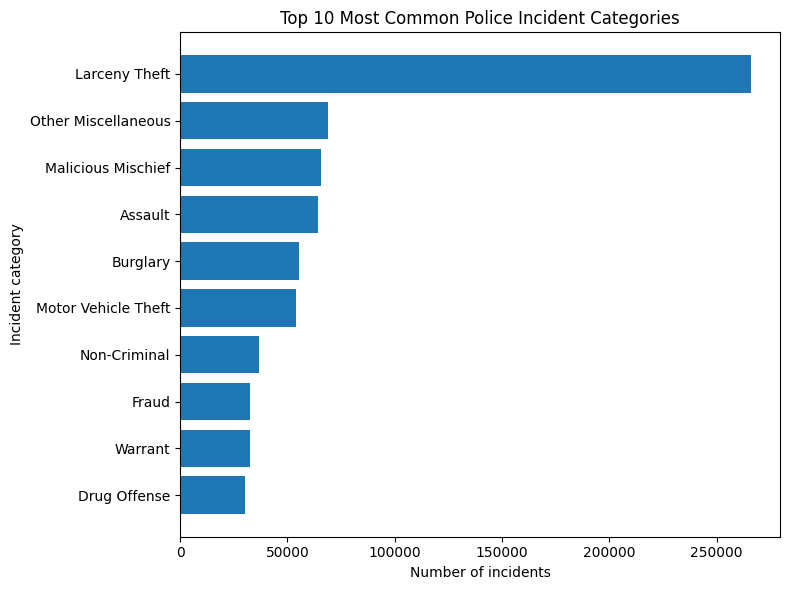

In [6]:
top_n = 10

top_counts = (
    df_clean["incident category"]
    .value_counts()
    .head(top_n)
    .sort_values(ascending=True)
)

plt.figure(figsize=(8, 6))
plt.barh(top_counts.index, top_counts.values)
plt.xlabel("Number of incidents")
plt.ylabel("Incident category")
plt.title(f"Top {top_n} Most Common Police Incident Categories")

plt.tight_layout()
plt.show()


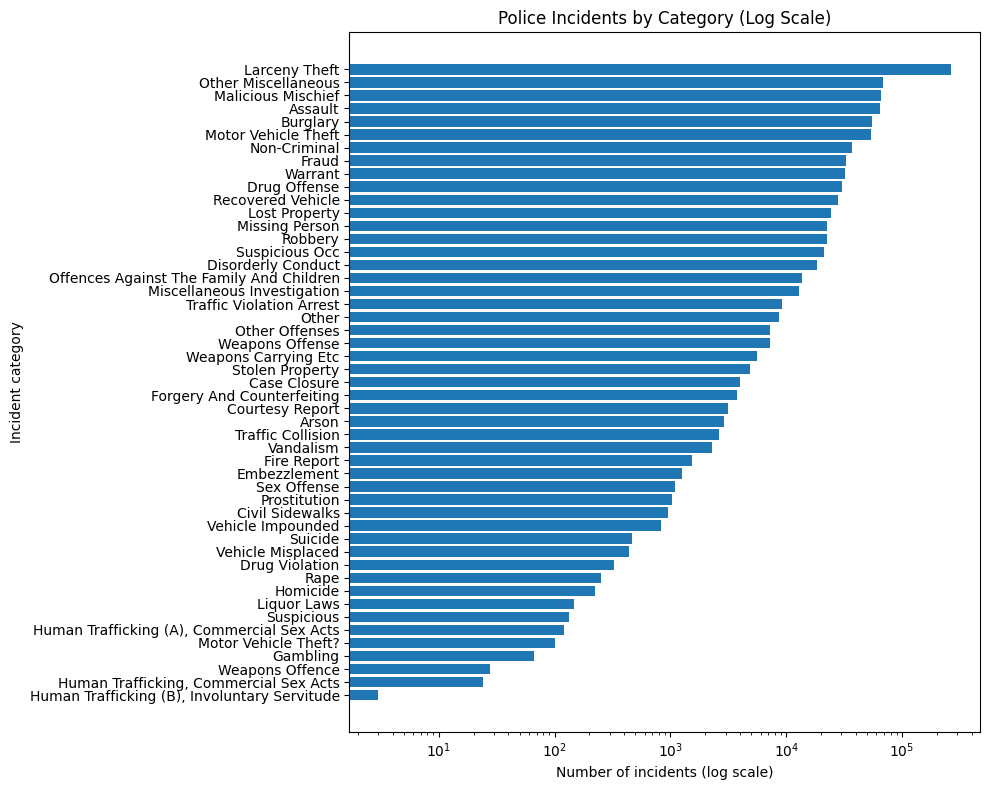

In [7]:
plt.figure(figsize=(10, 8))
plt.barh(category_counts.index, category_counts.values)
plt.xscale("log")
plt.xlabel("Number of incidents (log scale)")
plt.ylabel("Incident category")
plt.title("Police Incidents by Category (Log Scale)")

plt.tight_layout()
plt.show()


---

# Part 4: Temporal Patterns

Static counts are useful, but crime isn't static—it changes over time. Let's investigate temporal patterns.

> **Exercise 4.1**: Yearly crime counts
>
> * Count the total number of incidents per year
> * Which year had the most incidents? The fewest?
> * Create a bar chart showing incidents by year
> * What do you notice? Any years that stand out? (Think about what was happening in the world...)

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> Use an LLM freely for the data manipulation and plotting. Use your own brain for interpreting what you see.
</div>

Incidents per year:
incident year
2018    139575
2019    134698
2020    108958
2021    118577
2022    124663
2023    122607
2024    102714
2025     88993
Name: count, dtype: int64

Year with the most incidents: 2018 (139,575)
Year with the fewest incidents: 2025 (88,993)


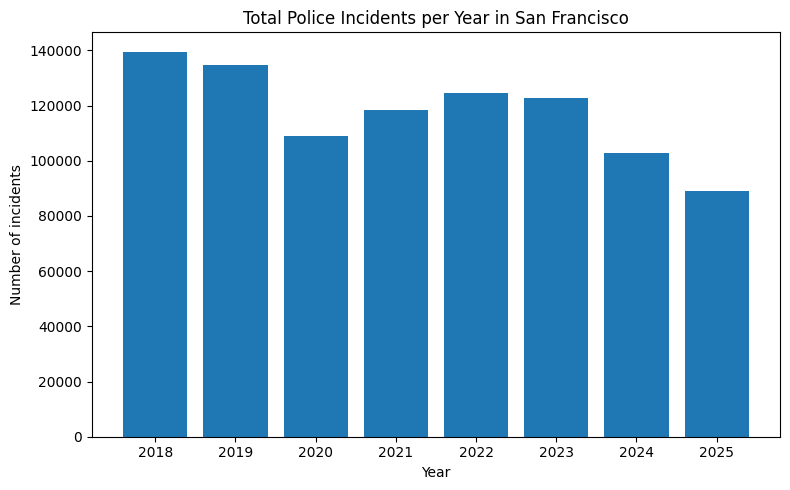

In [8]:
import matplotlib.pyplot as plt

# Count incidents per year
yearly_counts = (
    df_clean["incident year"]
    .value_counts()
    .sort_index()  # chronological order
)

print("Incidents per year:")
print(yearly_counts)

most_incidents_year = yearly_counts.idxmax()
least_incidents_year = yearly_counts.idxmin()

print(f"\nYear with the most incidents: {most_incidents_year} ({yearly_counts.max():,})")
print(f"Year with the fewest incidents: {least_incidents_year} ({yearly_counts.min():,})")

plt.figure(figsize=(8, 5))
plt.bar(yearly_counts.index.astype(str), yearly_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of incidents")
plt.title("Total Police Incidents per Year in San Francisco")

plt.tight_layout()
plt.show()



### Focus Crimes

Looking at all crimes together can obscure important patterns. Different types of crime may have very different trends.

Let's focus on a subset of 16 crimes — I've chosen these as examples of serious & common crimes:

In [9]:
focus_crimes = [
  'Larceny Theft',
  'Assault',
  'Burglary',         
  'Motor Vehicle Theft',
  'Fraud',
  'Drug Offense',  
  'Missing Person',
  'Robbery',
  'Disorderly Conduct',
  'Weapons Offense',
  'Stolen Property',  
  'Arson',   
  'Traffic Collision',
  'Vandalism',
  'Sex Offense',
  'Prostitution',  
]

These crimes are worth examining individually because:
- They're serious enough to warrant police attention
- They are different enought to have different patterns and drivers
- Some (like drug offenses) are particularly susceptible to enforcement bias—more police presence leads to more arrests, which looks like more crime, which justifies more police presence...

> **Exercise 4.2**: Focus crime trends
>
> * Create a grid of subplots (e.g., 4x4) showing the year-by-year trend for each focus crime
> * Each subplot should show years on the x-axis and incident count on the y-axis
> * Make sure each subplot is labeled so viewers know what they're looking at
>
> **Visualization tips:**
> * When you have multiple subplots, you don't need to label every axis—shared labels on the edges are fine
> * Use `plt.tight_layout()` to prevent overlapping
> * Consider using consistent y-axis scales to enable comparison, OR let each scale independently to see patterns within each crime type (there are arguments for both approaches)

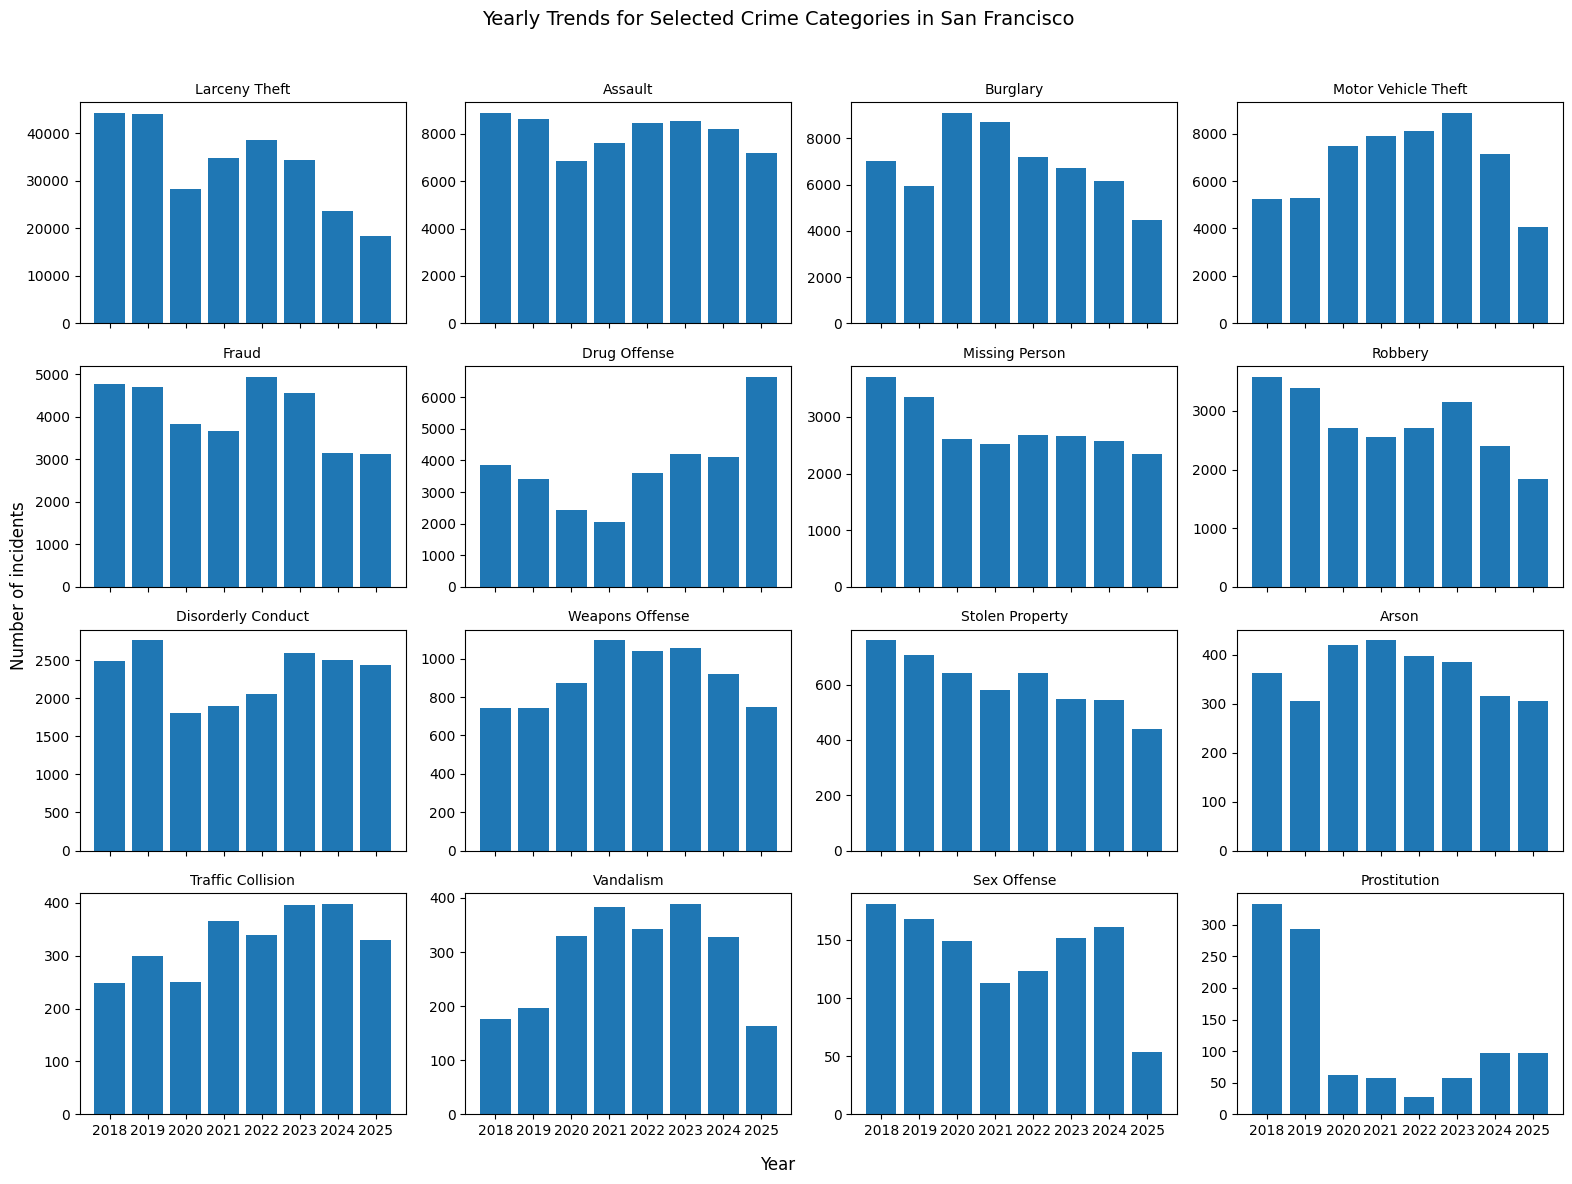

In [10]:
import matplotlib.pyplot as plt

# -----------------------------
# Focus crime categories
# -----------------------------
focus_crimes = [
    "Larceny Theft",
    "Assault",
    "Burglary",
    "Motor Vehicle Theft",
    "Fraud",
    "Drug Offense",
    "Missing Person",
    "Robbery",
    "Disorderly Conduct",
    "Weapons Offense",
    "Stolen Property",
    "Arson",
    "Traffic Collision",
    "Vandalism",
    "Sex Offense",
    "Prostitution",
]

# -----------------------------
# Prepare the figure (4x4 grid)
# -----------------------------
fig, axes = plt.subplots(4, 4, figsize=(16, 12), sharex=True)
axes = axes.flatten()

# -----------------------------
# Plot each crime's yearly trend
# -----------------------------
for ax, crime in zip(axes, focus_crimes):
    crime_df = df_clean[df_clean["incident category"] == crime]

    yearly_counts = (
        crime_df["incident year"]
        .value_counts()
        .sort_index()
    )

    ax.bar(yearly_counts.index.astype(str), yearly_counts.values)
    ax.set_title(crime, fontsize=10)

# -----------------------------
# Global labels and layout
# -----------------------------
fig.suptitle("Yearly Trends for Selected Crime Categories in San Francisco", fontsize=14)
fig.supxlabel("Year")
fig.supylabel("Number of incidents")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


> **Exercise 4.3**: Interpret your findings
>
> Look at the focus crime plots and comment on at least **three interesting patterns** you observe. Consider:
> * Do all crimes follow the same trend, or do different crimes behave differently?

Different crime categories behave very differently over time. Property crimes such as *Larceny Theft*, *Burglary*, and *Robbery* show large fluctuations, while crimes like *Assault* remain relatively stable across years. Some categories (e.g., *Motor Vehicle Theft* and *Drug Offense*) increase in later years, while others steadily decline, showing that crime trends are not uniform and depend strongly on the type of incident.

> * Are there any sudden changes? What might explain them?

Yes, several categories show sharp changes around specific years. Many crimes experience a noticeable drop in 2020, followed by partial recovery or divergence afterward. *Motor Vehicle Theft* increases sharply after 2020, while *Drug Offense* drops and then rebounds strongly. These sudden shifts likely reflect major disruptions to daily life, changes in policing priorities, and broader social and economic instability rather than gradual trends.

**How might the COVID-19 pandemic (2020–2021) have affected different crime types?**  
> * How might the COVID-19 pandemic (2020-2021) have affected different crime types?

The pandemic appears to have had a strong but uneven impact across crime types. Crimes tied to public movement and commercial activity (such as *Larceny Theft* and *Robbery*) decline sharply during 2020–2021, likely due to lockdowns and reduced mobility. In contrast, enforcement-driven categories like *Drug Offense* and *Prostitution* show large drops that likely reflect reduced policing or shifted priorities rather than reduced underlying activity. Overall, COVID-19 acted as a major structural break, affecting different crimes in distinct ways.

<div class="alert alert-block alert-info">
<b>LLM guidance:</b> The interpretation should be your own thinking. This is where you practice data analysis reasoning.
</div>

---

## You've Completed Week 1!

You've loaded real-world data, created visualizations, identified patterns, and thought critically about the implications of using data in high-stakes contexts.

If you want to go further:
* Take a look at the data from before 2018
* If you want to go nuts, you can merge the two datasets. It's not easy because the crime-types are not consistent over time, but perhaps you can ask an LLM to help you identify which ones can be matched up.
* Experiment with your visualizations—try different color schemes, annotations, or plot types
* Look at other temporal patterns: Are there differences by day of week? Time of day?
* Explore the spatial data: Which police districts have the most crime? (We'll dig into this more in coming weeks)